# Online Shoppers Purchasing Intention Prediction

In the evolving landscape of e-commerce, accurately predicting online shoppers’ purchasing intentions poses a significant challenge. This report examines the use of advanced Artificial Intelligence (AI) techniques to predict purchase likelihood on an e-commerce platform. We analyze a dataset rich in both numerical and categorical metrics of user interactions, applying machine learning algorithms such as Decision Trees, Random Forests, and Neural Networks to identify patterns indicative of purchasing behavior. The report is structured to first present an exploratory data analysis (EDA), providing crucial
insights into the dataset. We address the challenge of class imbalance in the data, employing strategies like SMOTE to improve model accuracy. Following this, we details our approach to data preprocessing, performance evaluation and model selection, underlining our methodological rigor. Concluding with a comparative analysis and a discussion on feature importance, the report
outlines our efforts in leveraging AI to understand the complexities of online purchasing behavior.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [2]:
# Disable warning messages
import warnings
warnings.filterwarnings('ignore')

## Uploading dataset

In [3]:
df = pd.read_csv("/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv")
df.shape

(12330, 18)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

The chosen dataset (Sakar et al. 2019) provides both numerical (10) and categorical (8) features, including various aspects of user interaction and behavior on an e-commerce platform. The dataset includes 12330 rows which represent a unique user session on the website. The binary ’Revenue’ attribute (class label), is central to our study, indicating whether a user session resulted in a transaction.

### Redefining data type for some features
'OperatingSystems', 'Browser', 'Region', 'TrafficType' contain numerical values but are actually categorical features.

In [6]:
df.loc[:,['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('int64').astype('object')

## EDA

In this section, we conduct Exploratory Data Analysis (EDA) to gain initial insights into our dataset. EDA involves visually and statistically exploring the data to understand its basic properties. This step is essential for identifying any issues that need to be addressed before further analysis and helps us form hypotheses about the relationships within the data.

In [7]:
sns.set_theme()

### General statistics
We start with generic statistics to understand the distribution of data, identify any anomalies, and get a sense of the data quality.

Let's start with the quality of the data

In [8]:
# Search for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# Search for duplicate values
df.duplicated().sum(), df.shape

(125, (12330, 18))

There are no missing values in the dataset but we found 125 duplicated rows. Given that they are complete duplicates, we will remove them.

In [10]:
# We get rid of duplicated data
df.drop_duplicates(inplace=True, keep='first')
df.duplicated().sum(), df.shape

(0, (12205, 18))

Let's now look at measures like mean, median, standard deviation, and count for numerical attributes, and frequency counts for categorical attributes.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  object 
 12  Browser                  12205 non-null  object 
 13  Region                   12205 non-null  object 
 14  TrafficType              12

Among the features we have: 1 boolean, 14 numerical and 2 categorical attributes.

Let's now calculate general statistics of the dataset.

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


We can note that:

1. The 'Administrative', 'Informational', 'Product Related', and their respective duration attributes show a wide range of values. This suggests a significant variation in how different visitors interact with the website. For instance, 'Product Related' visits range from 0 to 705, indicating diverse visitor engagement levels.

2. The 'Administrative Duration', 'Informational Duration', and 'Product Related Duration' have high standard deviations compared to their means, suggesting that the time spent on these pages varies greatly among users.

3. The 'Bounce Rates' and 'Exit Rates' are relatively low on average but with notable variability (standard deviation close to the mean). This indicates that while most pages perform well in retaining visitors, some pages might be causing visitors to leave.

4. The 'Page Values' attribute, which indicates the average value of a web page in the path to a transaction, varies greatly (mean of 5.89 but a high standard deviation of 18.57), suggesting that some pages are much more influential in leading to sales.

5. The 'Special Day' feature has a low mean (0.061), indicating that most visits are not near special days. However, further analysis might reveal spikes in transactions or visits near specific dates.

### Categorical features visualisation

We plot the histograms of the categorical features

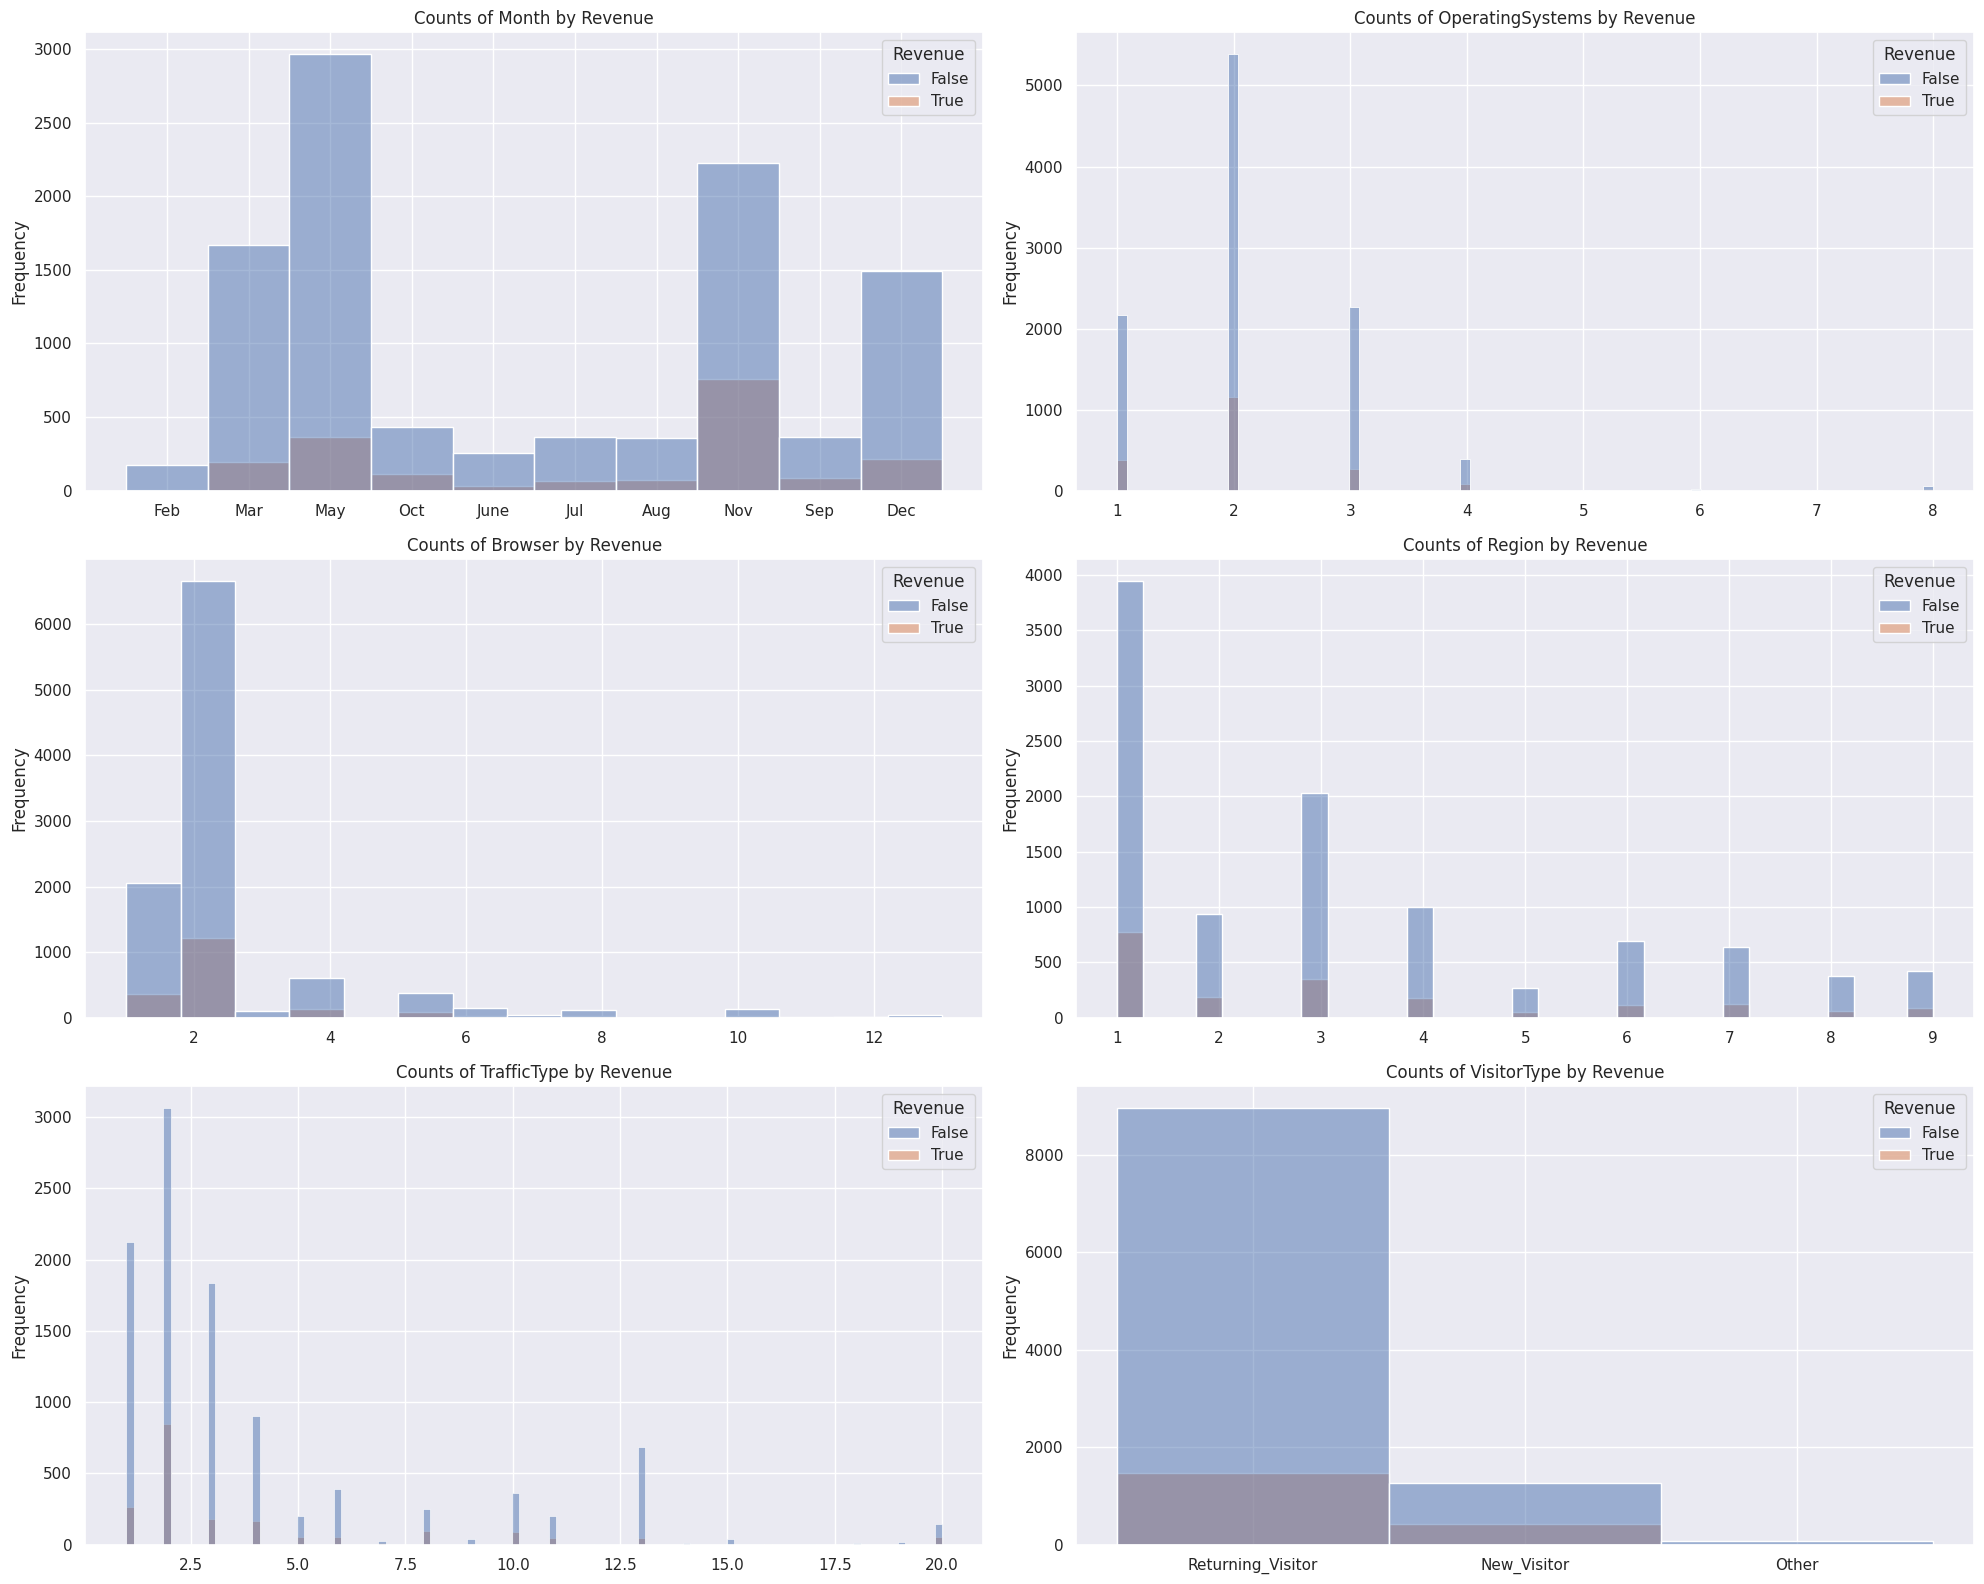

In [13]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(df.select_dtypes(include='object').columns, axes.flatten()):
    sns.histplot(data=df, x=df[col].values, hue="Revenue", ax=ax)
    ax.set_title(f'Counts of {col} by Revenue')
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Conclusions:
* __Month__: There seems to be a seasonal pattern with certain months like November and May having higher frequencies of purchases. This could be due to holiday shopping periods.

* __Operating System__: Some operating systems have higher purchase frequencies which might indicate user preference or a better user experience on those systems.

* __Browser__: Similar to the operating system, some browsers show a higher frequency of purchases. This might be due to compatibility or ease of transaction on certain browsers.

* __Region__: Some regions show higher purchasing behavior. This could be influenced by regional promotions or shipping options.

* __Traffic Type__: Certain types of traffic to the site are more likely to convert into purchases. For example, direct traffic or traffic from certain marketing campaigns may result in higher conversions.

* __Visitor Type__: Returning visitors are more likely to make a purchase than new visitors, indicating the importance of customer retention and the potential value of targeting repeat customers.

### Distributions of numerical features

We plot the distribution of numerical features

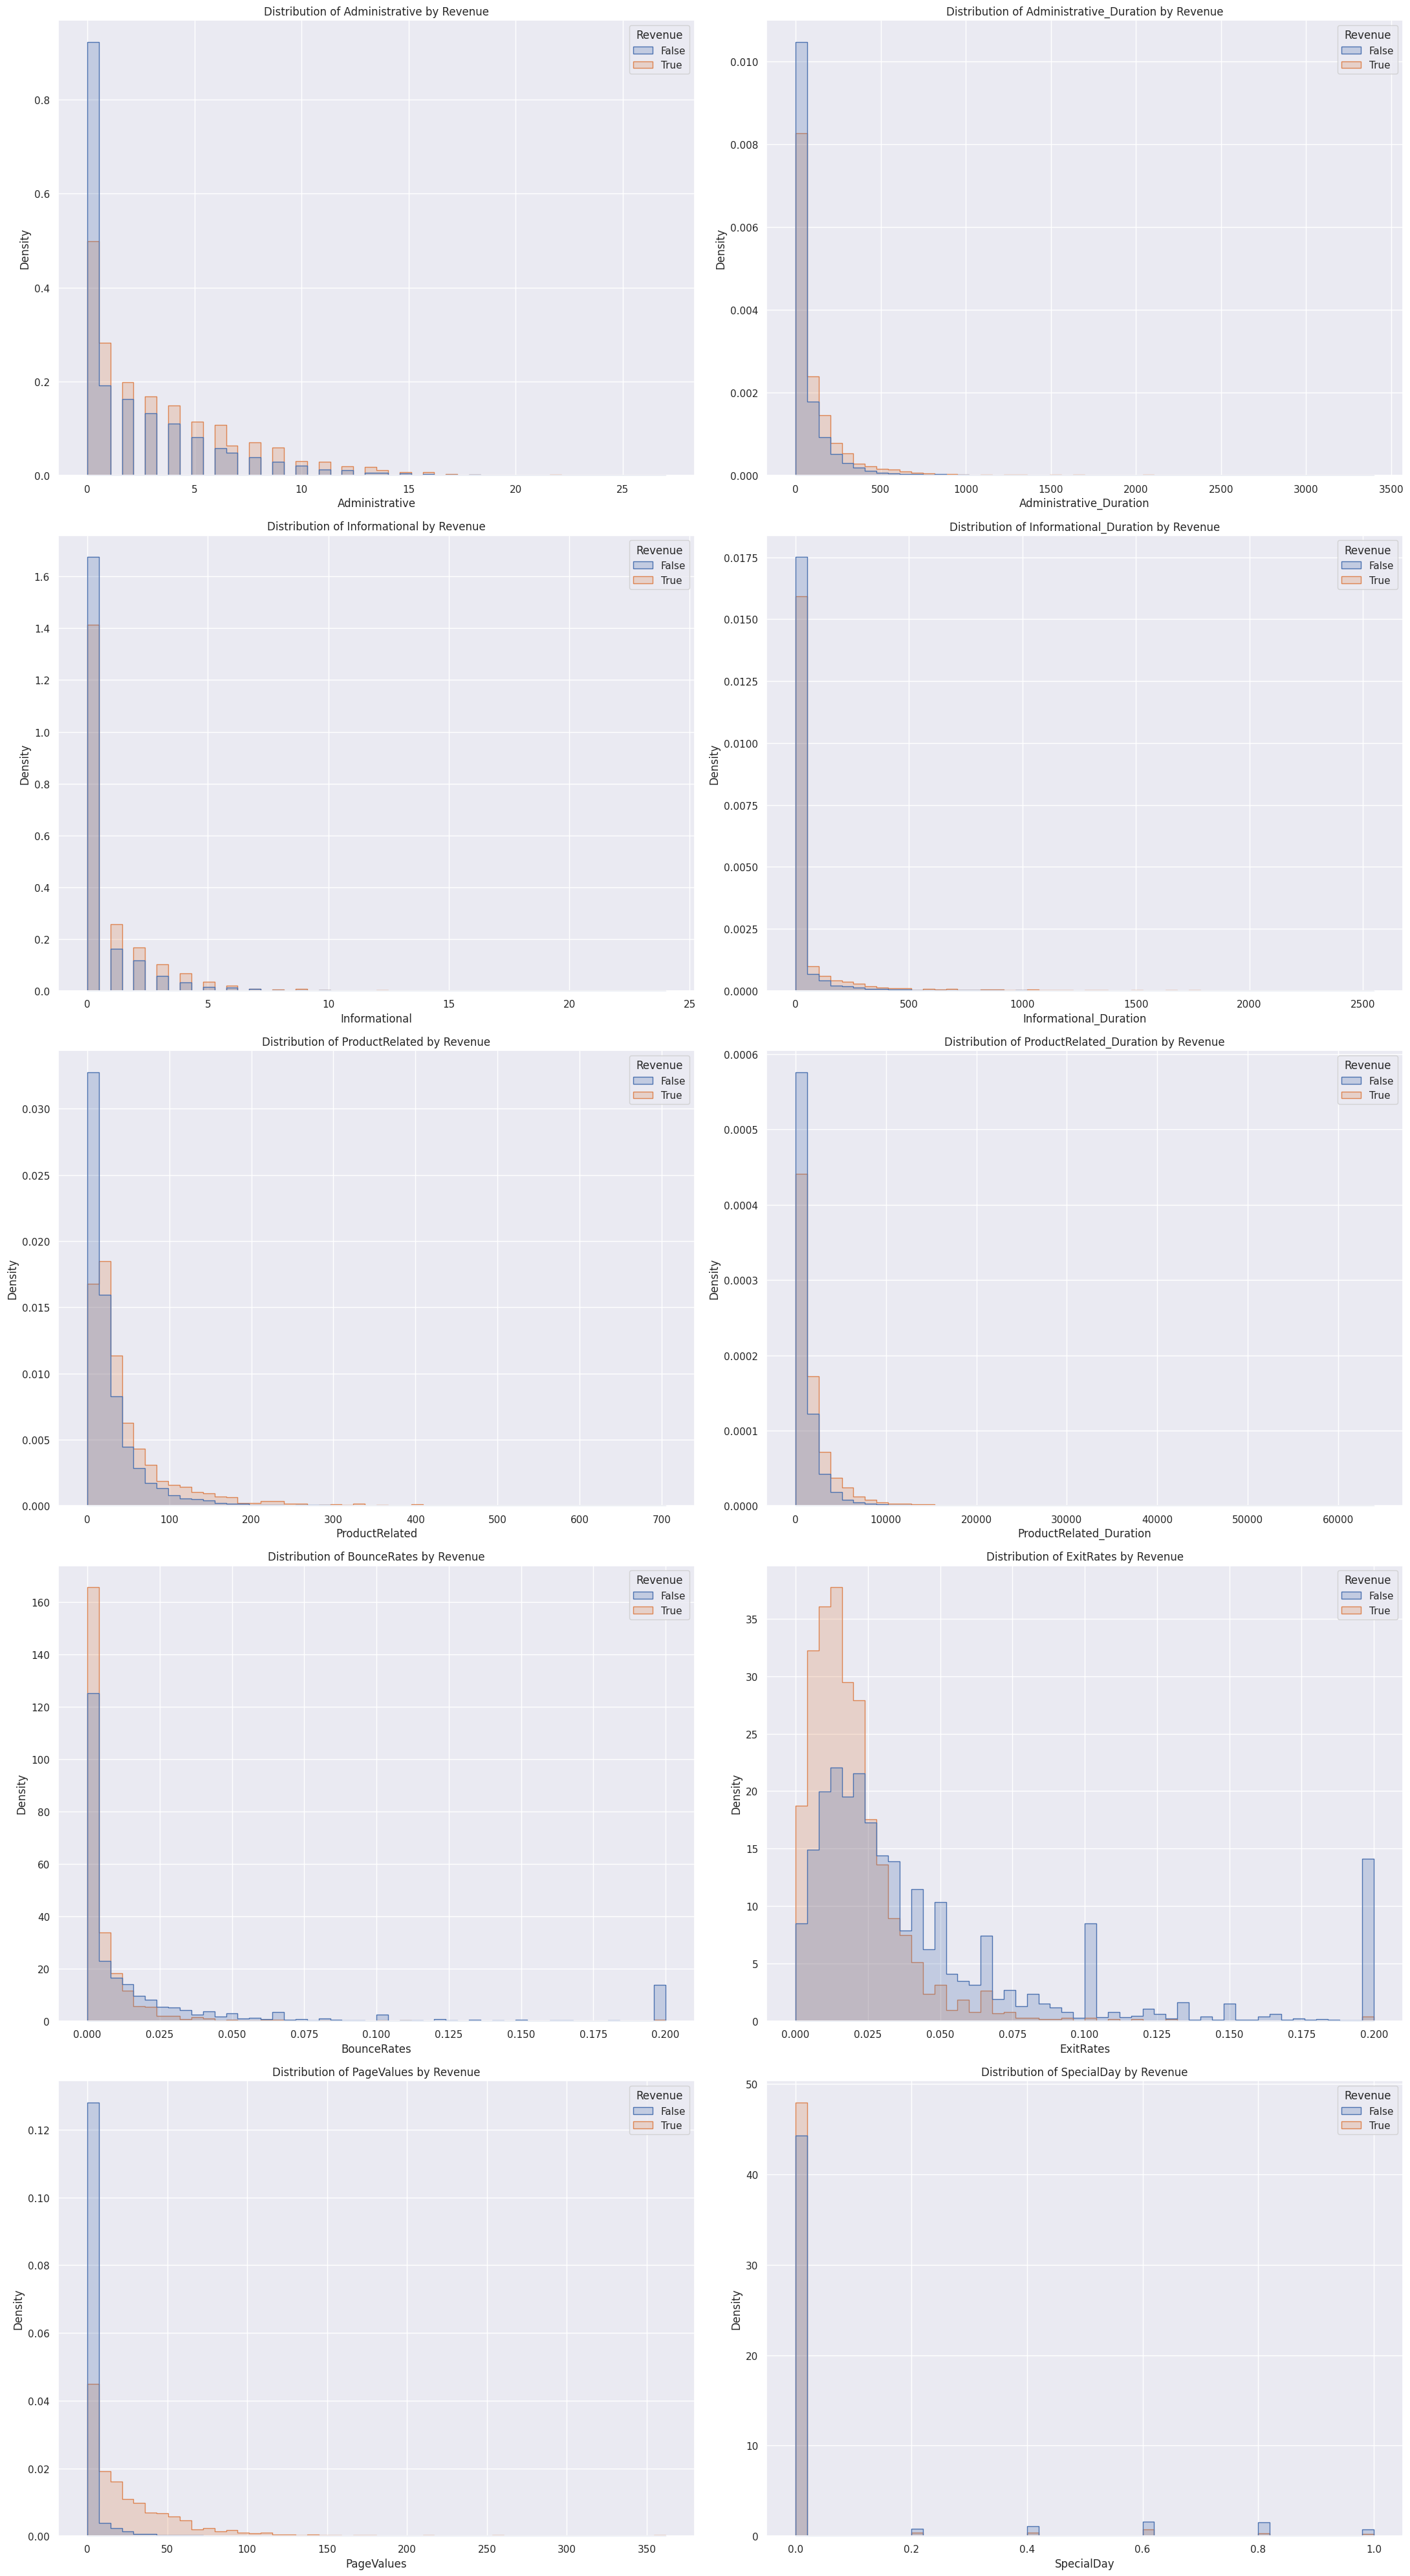

In [14]:
sns.set_theme()
# Set up the matplotlib figure
fig, axes = plt.subplots(5, 2, figsize=(22, 40))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(df.select_dtypes(include='number').columns, axes.flatten()):
    sns.histplot(data=df, x=col, hue="Revenue", element="step", stat="density", common_norm=False, bins=50, ax=ax)
    ax.set_title(f'Distribution of {col} by Revenue')

plt.tight_layout()
plt.show()


The histograms split by the target variable Revenue give us insights into how different user behaviors and site interactions are associated with the likelihood of a session resulting in a transaction.

* __Administrative, Informational, Product Related__: The number of pages visited in these categories is generally higher for sessions that result in revenue. This suggests that engaging with content across these different page types is positively associated with the likelihood of a transaction.

* __Administrative Duration, Informational Duration, Product Related Duration__: Similarly, the time spent on these types of pages is higher for sessions that result in revenue. This implies that not just the number of pages but also the depth of engagement (as measured by time) correlates with transaction likelihood.

* __Bounce Rate__: The sessions that did not result in revenue tend to have a higher bounce rate. A high bounce rate implies that users are leaving after viewing only one page, which is negatively associated with transactions.

* __Exit Rate__: Sessions with no revenue have higher exit rates, indicating that users are more likely to leave the site from any given page. A lower exit rate in revenue-generating sessions suggests users navigate through more pages before ending their session, which is a positive sign of engagement.

* __Page Value__: There's a clear distinction in page value distribution between revenue and non-revenue sessions. Pages that are visited before a transaction have higher page values, showing their importance in the conversion process.

* __Special Day__: The histogram shows that the presence of revenue is more likely when the 'Special Day' value is closer to zero, implying that regular days may result in more transactions than special days, which could be counterintuitive and warrants further investigation.

### Bivariate analysis

We perform bivariate analysis to get insights into relationship between pair of features

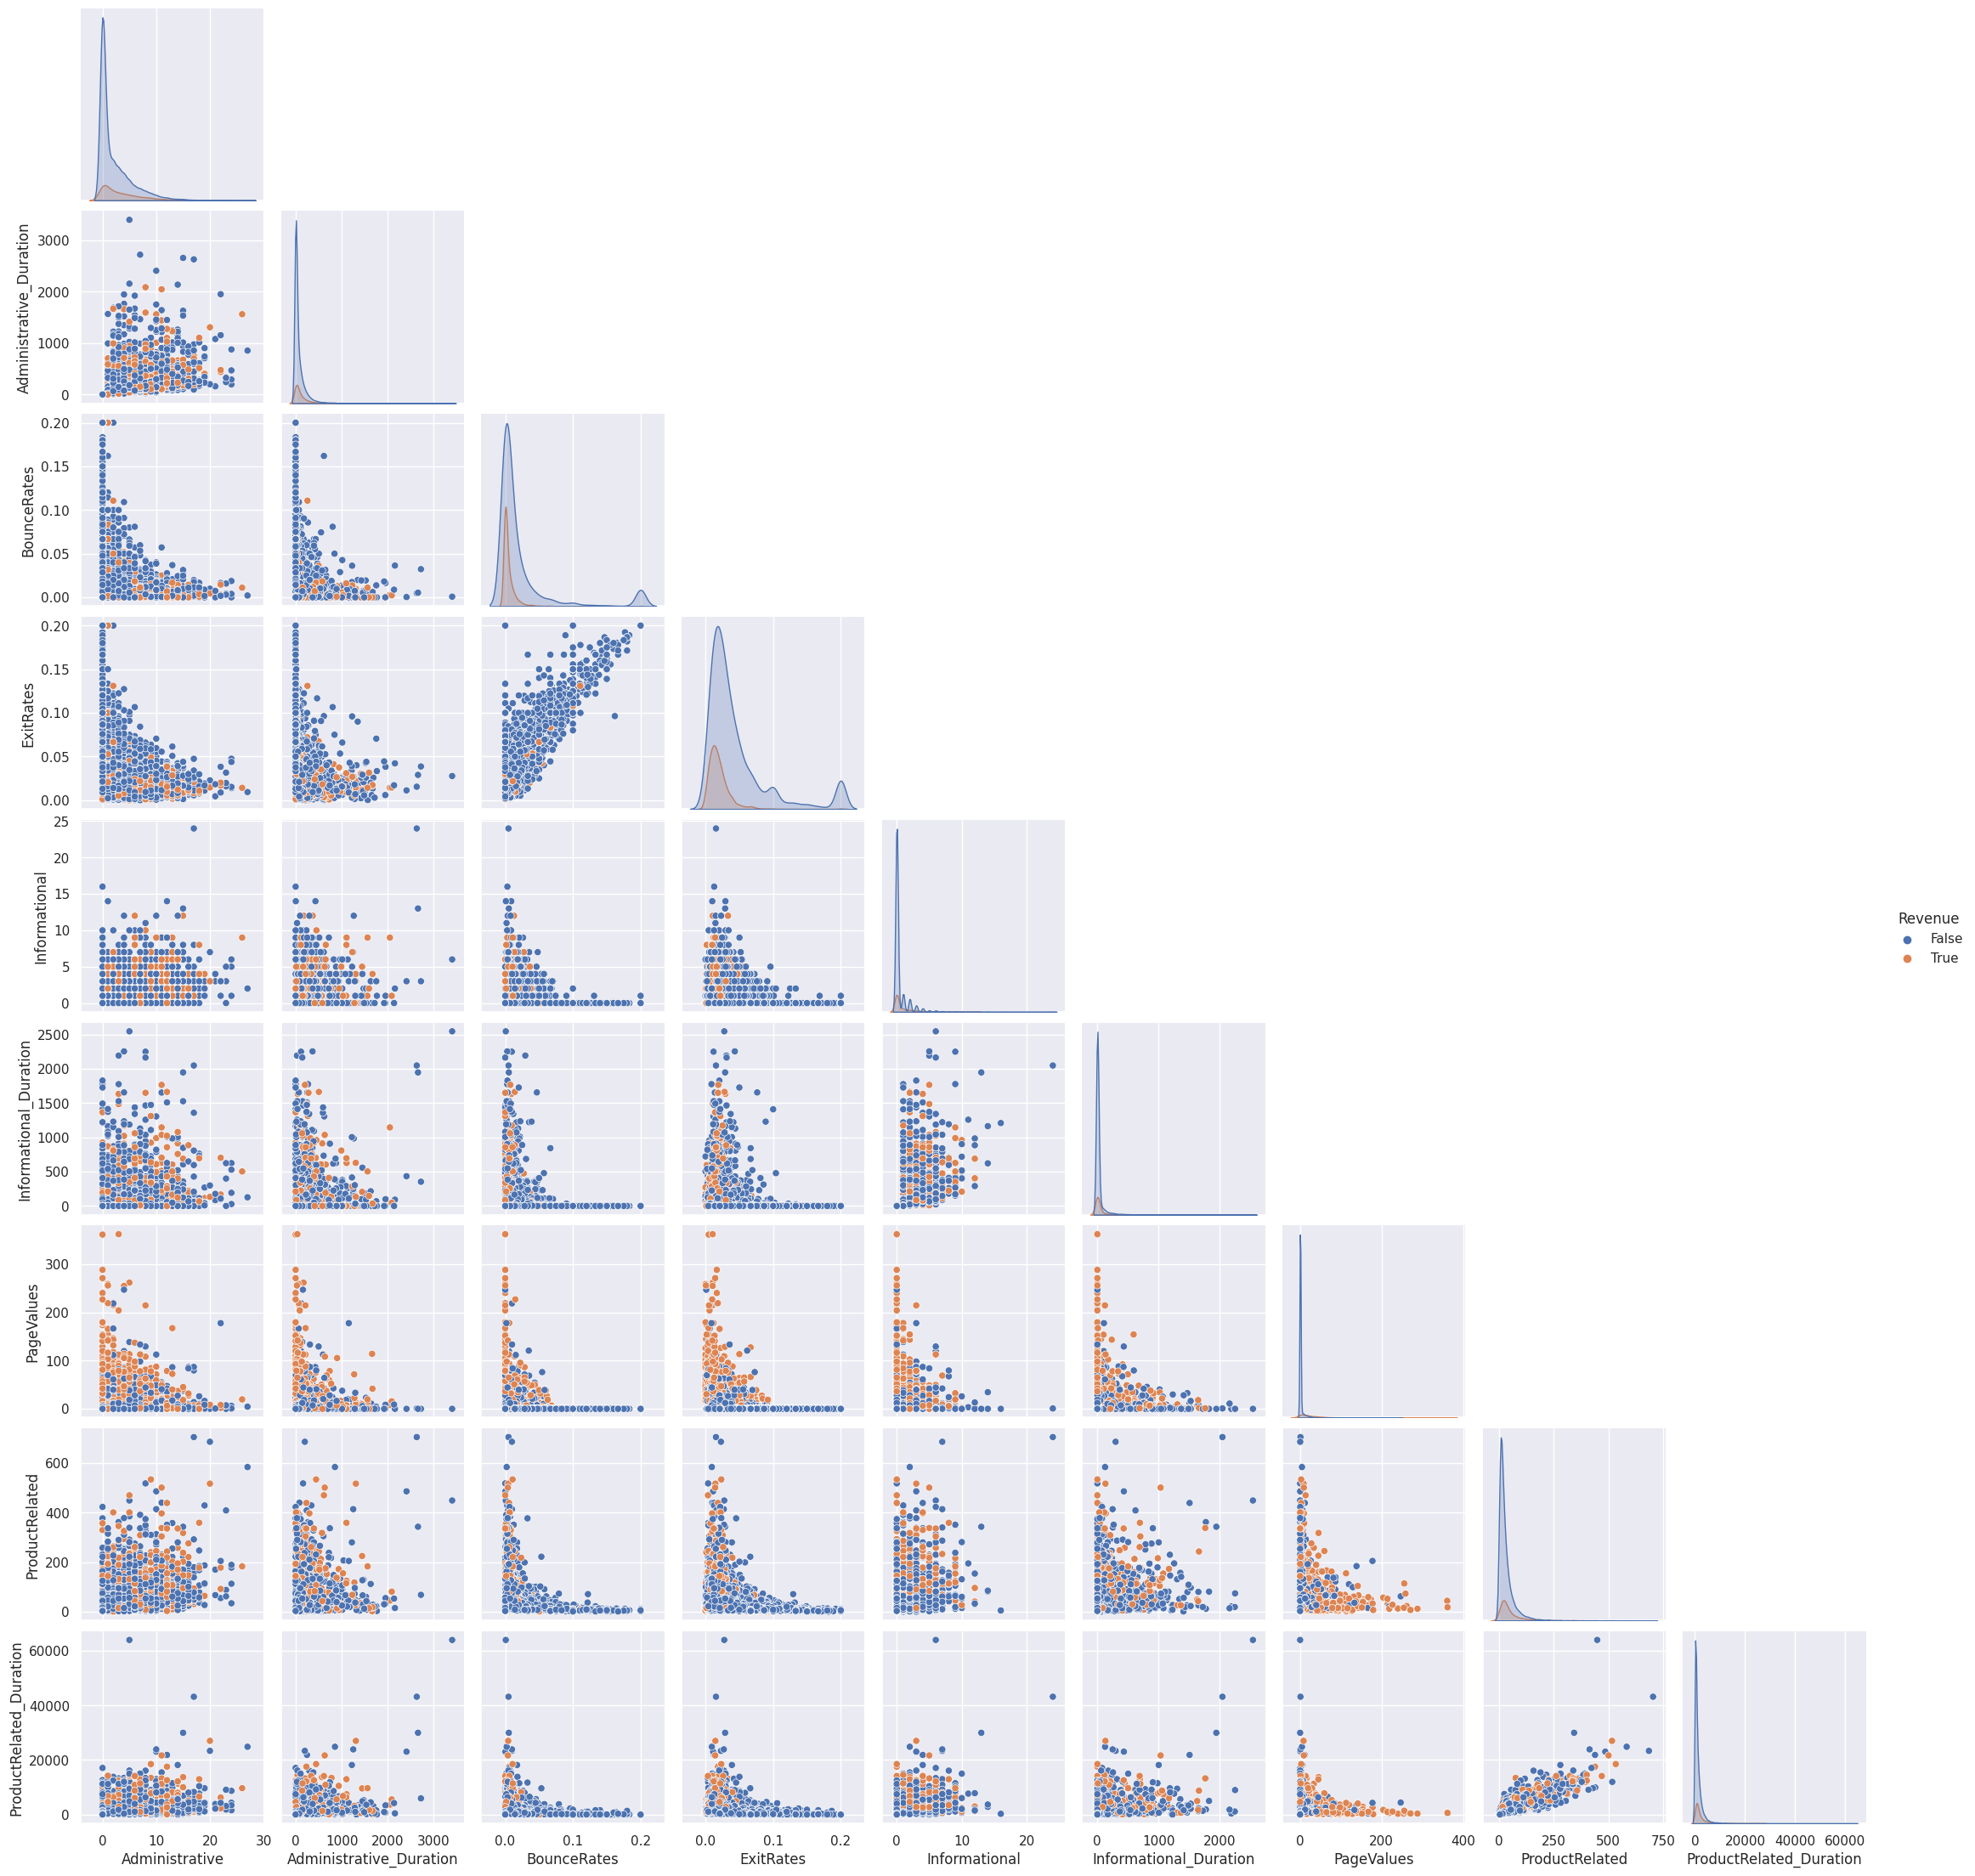

In [15]:
sns.pairplot(df[df.select_dtypes(include=['number', 'bool']).columns.difference(['SpecialDay', 'Weekend'])], hue = 'Revenue', corner=True)

### Imbalanced data

We investigate the imbalance of the Revenue class label

In [16]:
df.Revenue.value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

A critical aspect of our dataset is its significant class imbalance. In our dataset, only a small fraction of sessions (18%) result in transactions. This imbalance can skew predictive modeling, leading to a bias towards the majority class. To mitigate this, we plan to implement SMOTE (Chawla et al. 2002) to oversample the minority class, balancing the distribution between transactional
and non-transactional sessions. This approach generates synthetic samples that are plausible and representative, improving the model’s ability to generalize from a balanced dataset.

## Correlational Matrix
A correlation matrix quantifies the degree and direction of the linear relationship between pairs of variables.

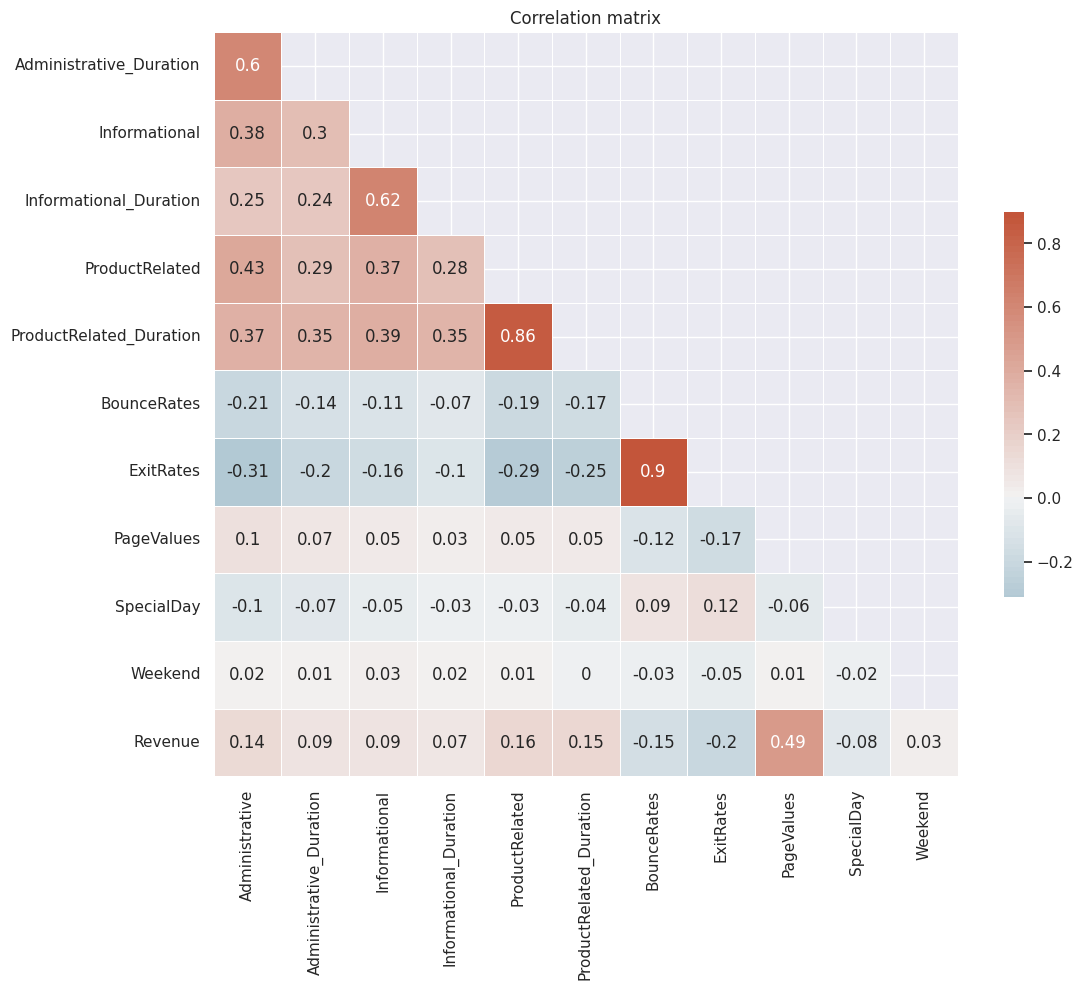

In [17]:
# Moving the Revenue label to the end for better visualisation
cols = [c for c in df if c != 'Revenue'] + ['Revenue']
df = df[cols]

# Correlational Matrix
df_corr_matrix = df[df.select_dtypes(include=['number', 'bool']).columns].corr().round(2)

# Plotting
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_corr_matrix))
cmap = sns.diverging_palette(230, 20, n=100)
ax = sns.heatmap(df_corr_matrix, mask=mask, annot=True, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xlim(0,len(df_corr_matrix)-1)
ax.set_ylim(len(df_corr_matrix),1)
#ax.collections[0].set_clim(-1,1) 
plt.title('Correlation matrix')
plt.show()

Our matrix evaluates these relationships, identifying variables that exhibit a significant correlation with the ’Revenue’ attribute, which may suggest predictability but not
causality. The matrix highlights that the correlation coefficients between the ’Revenue’ attribute and other features are relatively low, indicating the presence of complex, possibly non-linear patterns, between the label and the features.

## Preprocessing

The data preprocessing phase is crucial for preparing the dataset for machine learning algorithms. This step involved specific techniques to handle categorical variables and the unique nature of certain features, as described below.

### Encoding the Month feature using cyclical encoding
Recognizing the cyclical nature of months, we applied cycle encoding to the ’Month’ feature. Traditional numerical encoding would inadequately represent the relationship between months due to their recurring pattern. To address this, we used sine and cosine transformations to map each month to a point on a circle, effectively capturing the cyclical progression of months. This technique is particularly important in modeling e-commerce data, as
it can allow the algorithms to recognize and leverage seasonal trends in online shopping behavior.

In [18]:
# Assign a numerical value to each month
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5,
    'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 
    'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['month_num'] = df['Month'].map(month_to_num)

# Encode with sine and cosine
df['month_sin'] = np.sin((df['month_num'] - 1) * (2. * np.pi / 12))
df['month_cos'] = np.cos((df['month_num'] - 1) * (2. * np.pi / 12))

df.drop(columns=['Month', 'month_num'], inplace=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,month_sin,month_cos
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,0.5,0.866025
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,0.5,0.866025
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,0.5,0.866025
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,0.5,0.866025
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,True,False,0.5,0.866025


### Encoding VisitorType feature

In [19]:
df['VisitorType_Returning_Visitor'] = 0
df['VisitorType_New_Visitor'] = 0
df['VisitorType_Other'] = 0

df.loc[df['VisitorType']=='Returning_Visitor', 'VisitorType_Returning_Visitor'] = 1
df.loc[df['VisitorType']=='New_Visitor', 'VisitorType_New_Visitor'] = 1
df.loc[df['VisitorType']=='Other', 'VisitorType_Other'] = 1

df.drop(columns=['VisitorType'], inplace=True)

### Encoding all the others categorical features with OneHotEncoding
The dataset included several categorical variables, such as ’OperatingSystems’, ’Browser’, ’Region’, ’VisitorType’ and ’TrafficType’. To make these features compatible with our models, we applied One-Hot encoding (Scikit-learn 2011d). This technique involves creating a new binary column for each category level in the original feature. This approach ensures that the models can process these categorical features without assuming any ordinal relationship between them.

In [20]:
encoder = OneHotEncoder(sparse_output=False)

for col in df.select_dtypes(include='object'):
    transformed = encoder.fit_transform(df[[col]])
    
    encoded_df = pd.DataFrame(transformed, columns=[f"{col}_{category}" for category in encoder.categories_[0]]) # Create a DataFrame from the encoded columns
   
    df = df.join(encoded_df.set_index(df.index)) # Add the new columns to the original DataFrame


df.drop(columns=df.select_dtypes(include='object').columns, inplace=True) # Drop the original categorical columns


In [21]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'month_sin', 'month_cos', 'VisitorType_Returning_Visitor',
       'VisitorType_New_Visitor', 'VisitorType_Other', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'Traffic

## Train-test split

In [22]:
y = df['Revenue'] # Labels
X = df[df.columns.difference(['Revenue']).to_list()] # Features

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline
We initiated our model evaluation with a Random Classifier baseline (makes predictions by randomly assigning a class based on a uniform distribution). This model’s performance sets a foundational benchmark for comparison with more advanced models.

Random Baseline:
              precision    recall  f1-score   support

       False       0.86      0.51      0.64      2079
        True       0.15      0.51      0.24       362

    accuracy                           0.51      2441
   macro avg       0.50      0.51      0.44      2441
weighted avg       0.75      0.51      0.58      2441



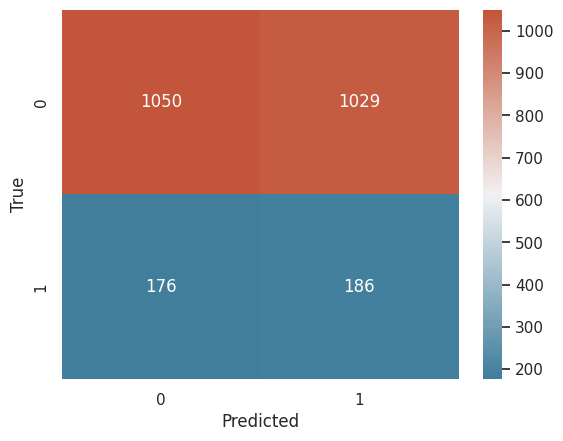

In [24]:
# Baseline using Random Classifier
majority_class_baseline = DummyClassifier(strategy='uniform')
majority_class_baseline.fit(X_train, y_train)
y_pred_majority = majority_class_baseline.predict(X_test)

print("Random Baseline:")
print(classification_report(y_test, y_pred_majority))

cm = confusion_matrix(y_test, y_pred_majority)
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Notably, the imbalance between precision and recall, particularly for the ’purchase’ class (Precision: 0.14, Recall: 0.46), indicates the model’s tendency to misclassify a significant number of non-purchase instances as purchases, a
direct consequence of the class imbalance in the dataset.

In [25]:
"""# BAseline using Most Frequent Classifier
majority_class_baseline = DummyClassifier(strategy='most_frequent')
majority_class_baseline.fit(X_train, y_train)
y_pred_majority = majority_class_baseline.predict(X_test)

print("Most Frequent Baseline:")
print(classification_report(y_test, y_pred_majority,zero_division=1))"""

'# BAseline using Most Frequent Classifier\nmajority_class_baseline = DummyClassifier(strategy=\'most_frequent\')\nmajority_class_baseline.fit(X_train, y_train)\ny_pred_majority = majority_class_baseline.predict(X_test)\n\nprint("Most Frequent Baseline:")\nprint(classification_report(y_test, y_pred_majority,zero_division=1))'

## Decision Tree Classifier
Given the class imbalance revealed during EDA, our first advanced model choice was the Decision Tree Classifier (Scikit-learn 2011f), which intrinsically perform well with imbalanced data because the splitting rules are sensitive to the class distributions in the subsets of the data they create. Moreover, the decision tree provides a clear visual representation of the decision-making process, making it easier to interpret and analyze the model’s behavior. This model uses the greedy recursive binary splitting alogorithm where the best split at each
node is the one that maximise the Information Gain, thus maximizing the purity of the subsets and ensuring the resulting nodes are as homogeneous as possible (Mitchell 1997). In this project, we used the entropy criterion for splitting which measures the degree of impurity in
the dataset:
$$ Entropy(S) = - \sum_{i=1}^n \, p_i \, \log_2 p_i = -p_{\oplus}\, log_2 p_{\oplus} - p_{\ominus}\, log_2 p_{\ominus} $$
where S is the set of samples, n is the number of classes, and pi is the proportion of the samples that belong to class i. Therefore, for an attribute A:
$$ Information Gain(S, A) \, :=\,\, Entropy(S) - \sum_{v \in Values(A)}  \frac{|S_v|}{|S|}Entropy(S_v) $$ 
where Values(A) is the set of all possible values for attribute A, and Sv, is the subset of S for which attribute A has value v (Mitchell 1997). Hence, Information Gain is defined as the expected reduction in entropy; that is, the difference between Entropy(S), the overall entropy of S, and the expected entropy for the subset Sv. After a few experiments, we set a maximum tree depth of 10 and required a minimum of 50 samples at each leaf node to prevent overfitting. Moreover, we standardized the features using a StandardScaler (Scikit-learn 2011e) to ensure uniformity in
variable scales, an essential step given the varied nature of the dataset’s features.

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2079
        True       0.71      0.58      0.64       362

    accuracy                           0.90      2441
   macro avg       0.82      0.77      0.79      2441
weighted avg       0.90      0.90      0.90      2441



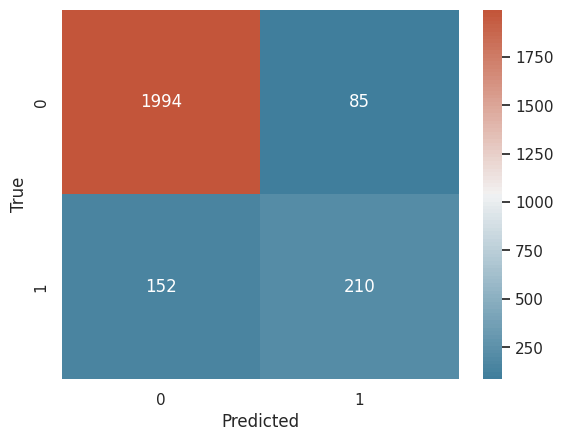

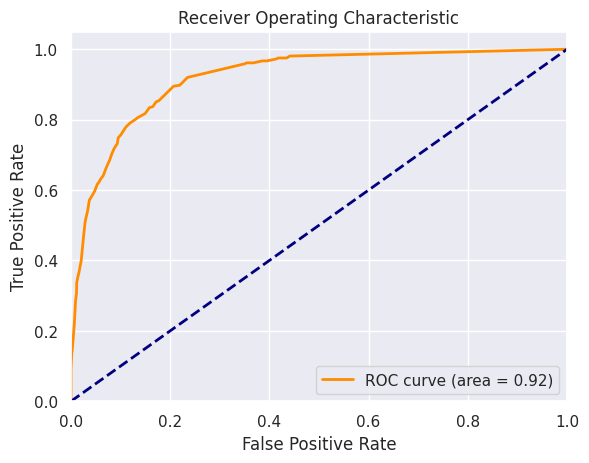

In [26]:
# Create a pipeline that first scales the data then applies Decision Tree Classifier
pipe = Pipeline([
                ('scaler', StandardScaler()), 
                ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50, random_state=42))
                ])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The model exhibited a high precision of 93% and recall of 96% for nonpurchases, confirming its efficacy in correctly predicting the majority class. Conversely, for the purchasing class, precision and recall were lower at 71% and 58%, respectively, with a resulting F1Score of 64%, indicating modest performance in identifying actual purchases. This is also reflected in the confusion matrix, which highlight 210 true positives and 152 false positive. The Decision Tree’s improved metrics over the baseline indicate its ability to discern patterns
in the data. Yet, the modest detection of purchasing behaviour demands model tuning or the
application of more advanced techniques (e.g., ensemble methods) for a deeper analysis of the data.

### Feature Importance
One of the most important characteristic of Decision Tree models is their interpretability, which offers a transparent view into the decision-making logic of the model. In the case of predicting
online shopping behavior, examining feature importance reveals, on average, which attributes most influence a user’s decision to purchase. In our case, the importance of each feature is measured as the (normalized) total reduction of the entropy brought by that feature.

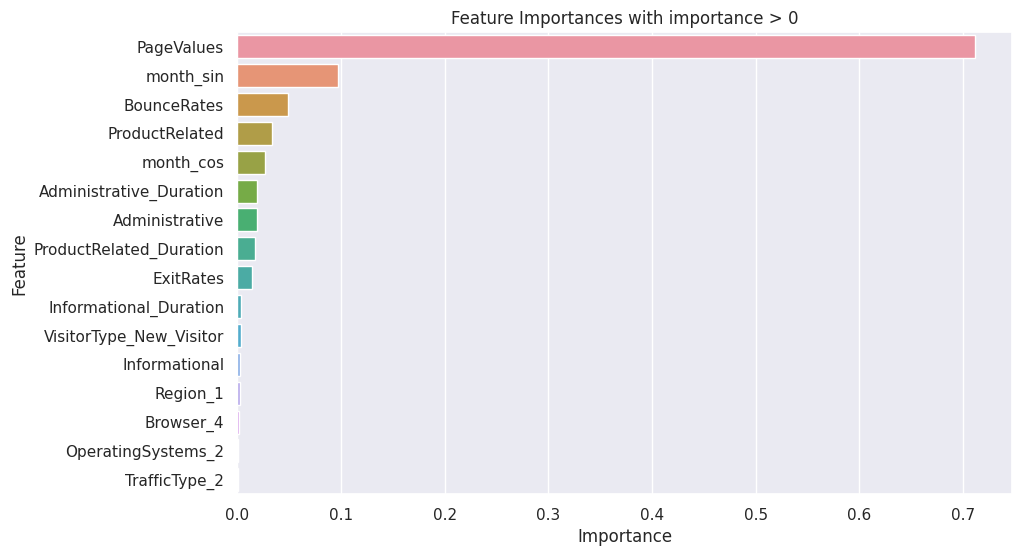

In [27]:
# Extract feature importances
feature_importances = pipe.named_steps['classifier'].feature_importances_


features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


features_df = features_df[features_df.Importance > 0] # remove feature with zero importance
features_df = features_df.sort_values(by='Importance', ascending=False) # sort by importance

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances with importance > 0')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The plot shows that ’PageValues’ stands out significantly compared to other features, indicating its crucial role in predicting customer purchasing intention.

Given its dominance, it is interesting to examine how a Naive Classifier, which solely utilizes ’PageValues’, performs against the fully-featured Decision
Tree model.

              precision    recall  f1-score   support

       False       0.92      0.94      0.93      2079
        True       0.63      0.56      0.59       362

    accuracy                           0.89      2441
   macro avg       0.78      0.75      0.76      2441
weighted avg       0.88      0.89      0.88      2441



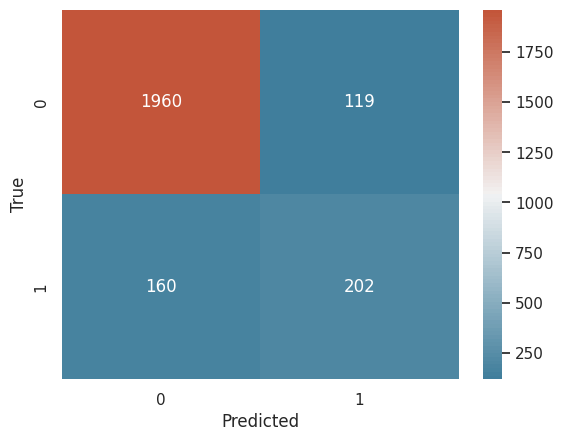

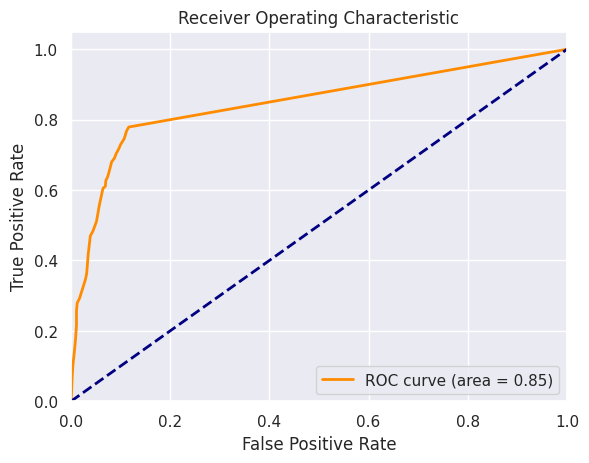

In [28]:
X_train_naive = X_train[['PageValues']]
X_test_naive = X_test[['PageValues']]
# Create a pipeline that first scales the data then applies Decision Tree Classifier
pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50, random_state=42))
                ])

# Fit and predict
pipe.fit(X_train_naive, y_train)
y_pred = pipe.predict(X_test_naive)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test_naive)[:, 1]  # get the probability of the positive class

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The Naive Classifier performance reveals the Decision Tree’s slight advantage, which incorporates a broader context through multiple features, resulting in higher precision and recall for predicting purchases; however, despite its simplicity, the naive
classifier underscores the critical influence of ’PageValues’.

### Using class_weight hyperparameter to handle class imbalance

              precision    recall  f1-score   support

       False       0.97      0.84      0.90      2079
        True       0.47      0.84      0.60       362

    accuracy                           0.84      2441
   macro avg       0.72      0.84      0.75      2441
weighted avg       0.89      0.84      0.85      2441



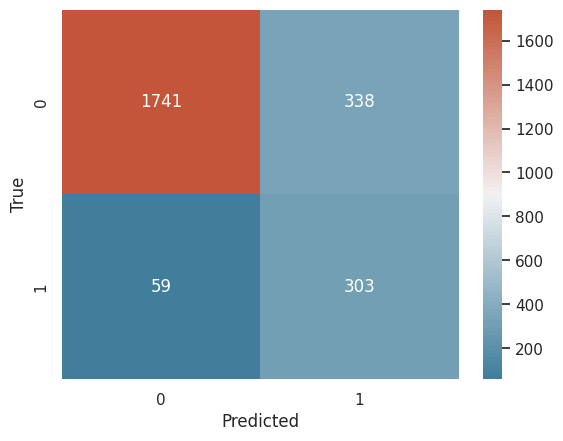

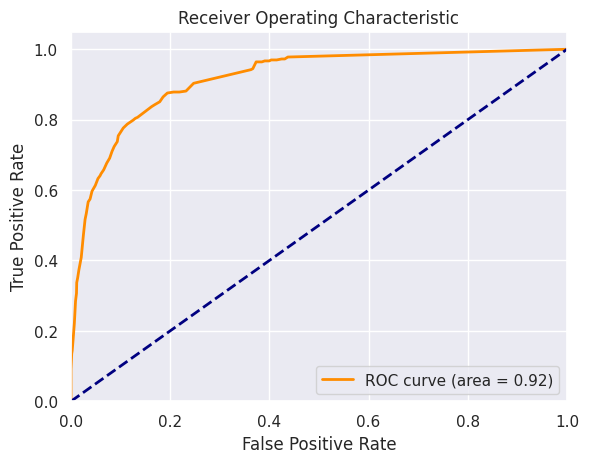

In [29]:
# Create a pipeline that first scales the data then applies Decision Tree Classifier
pipe = Pipeline([
                ('scaler', StandardScaler()), 
                ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50, class_weight='balanced', random_state=42))
                ])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Oversampling
As stated before, we used SMOTE oversampling technique to handle the imbalance in the dataset, including it in the pipeline after the standardization step.

              precision    recall  f1-score   support

       False       0.95      0.91      0.93      2079
        True       0.58      0.73      0.65       362

    accuracy                           0.88      2441
   macro avg       0.77      0.82      0.79      2441
weighted avg       0.90      0.88      0.89      2441



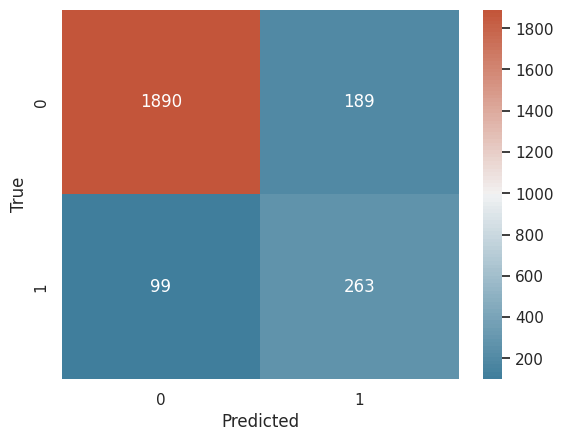

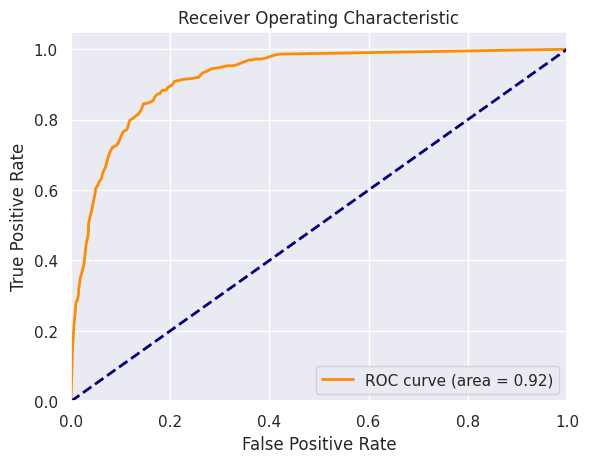

In [30]:
pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50, random_state=42))
])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

SMOTE improved the detection of actual purchasing sessions, with the recall for purchases rising to 73%, despite a modest decrease in precision to 58%. While the precision for non-purchases slightly increased to 95%, the recall saw a slight decline to 91%, suggesting a trade-off typically associated with addressing class imbalance. This is further evidenced by the rise in false positives, from 85 to 189, as shown in the confusion matrix. These adjustments underscore the efficacy of SMOTE in mitigating dataset imbalance, enhancing the model’s sensitivity to the minority class,
and potentially increasing revenue opportunities by better identifying likely buyers.

## Ensemble method - Random Forest Classifier
To build upon the decision tree model, we next implemented a Random Forest Classifier (Scikitlearn 2011a). This model, an ensemble of decision trees, operates by combine, using soft voting, the predictions of the individual trees, which are trained on random subsets of the features at each split. This allows the model to add variability across the trees reducing their correlation; thus, decreasing both bias and variance by ”averaging” the respective errors (Biau & Scornet 2016). This approach is particularly effective in our case, as it should capture more complex patterns within the dataset, leading to a more accurate prediction of purchasing intentions. Moreover, the comparison between the Random Forest and the Decision Tree is straightforward and provides insights into how ensemble methods can enhance performance. In our experiment, we applied the Random Forest Classifier with 75 trees, using identical
hyperparameters as our initial Decision Tree. This approach, along with SMOTE oversampling,
should improve prediction stability and accuracy by reducing variance.

              precision    recall  f1-score   support

       False       0.96      0.89      0.92      2079
        True       0.55      0.78      0.65       362

    accuracy                           0.87      2441
   macro avg       0.76      0.83      0.78      2441
weighted avg       0.90      0.87      0.88      2441



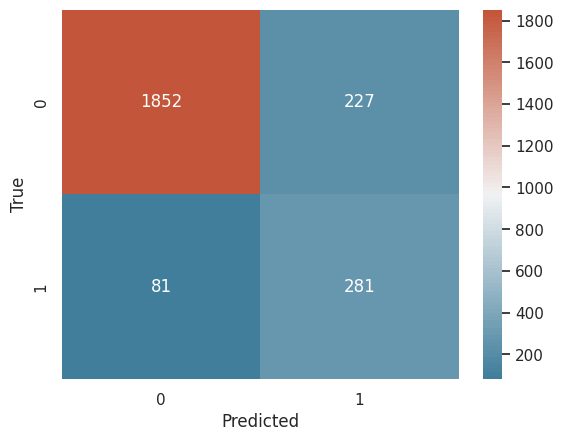

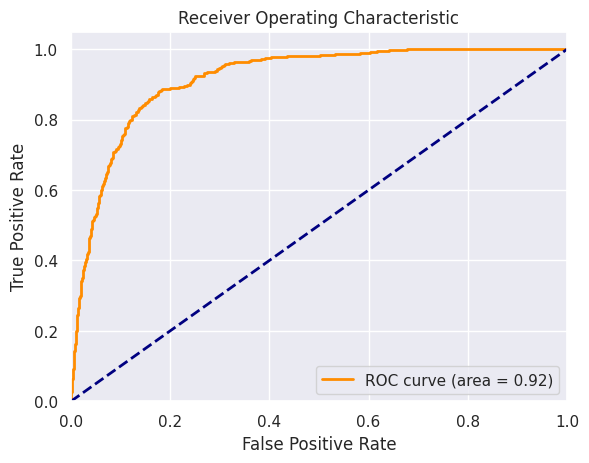

In [31]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=75, max_depth=10, min_samples_leaf=50, criterion='entropy', random_state=42))
])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The results illustrate that the Random Forest Classifier achieved similar performances to the Decision Tree Classifier considering the same preprocessing steps; in particular, the F1 score for the purchasing class is equivalent (65%). This unexpected behaviour may arise for different reasons and require some considerations. Firstly, the hyperparameter settings, optimal for the Decision Tree, may not extend their advantage to the Random Forest, suggesting a need for distinct, model-specific tuning. Secondly, if the dataset doesn’t have complex relationships between features, the Random Forest’s ability to deal with such complexities isn’t needed, and therefore doesn’t improve the results compared to a single Decision Tree. Finally, this outcome suggests we might have achieved the peak performance for our current dataset and feature set, potentially encountering the limit to model accuracy due to
inherent irreducible data noise.

## Neural Network
Neural Networks are a class of machine learning models, composed by a series of functions modeled on neurons, each taking a weighted sum of inputs and passing this through a non-linear activation function to produce an output. The power of neural networks lies in their ability to approximate complex non-linear relationships by adjusting weights through the backpropagation. To compare the performance of a Neural Network with that of a tree based model, we must
consider the same metrics across the same dataset and preprocessing steps. While Decision Trees offer interpretability and simplicity, Neural Networks provide flexibility and the capacity for capturing more complex non-linear interactions. The comparison thus hinges not only on performance
metrics but also on the complexity of the model and the interpretability of the results.
For our implementation, we constructed a feedforward neural network using Keras (Chollet et al. 2015) with a TensorFlow backend. As shown in Table 6, the architecture consists of an input layer with 128 neurons, a dense hidden layer with 256 neurons, a dropout layer with 25% dropout rate to reduce overfitting and another dense hidden layer with 64 neurons. The output layer employs a sigmoid activation function, appropriate for binary classification tasks. For the training process, illustrated by the loss plot (Figure 8), we chose a Binary Crossentropy loss function with Adam optimizer (Keras 2015b). The graph shows a steady decline in training loss, indicating that the model is learning effectively from the data. The validation loss mirrors this trend, suggesting that the model is generalizing well to unseen data. The Early Stopping (Keras 2015a) mechanism, which
stops training to prevent overfitting, was triggered after around 10 epochs.

2024-02-13 11:17:05.563629: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 11:17:05.563779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 11:17:05.730523: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100
103/103 [==============================] - 2s 8ms/step - loss: 0.4658 - accuracy: 0.7848 - val_loss: 0.3838 - val_accuracy: 0.8297
Epoch 2/100
103/103 [==============================] - 1s 6ms/step - loss: 0.3358 - accuracy: 0.8621 - val_loss: 0.3232 - val_accuracy: 0.8756
Epoch 3/100
103/103 [==============================] - 1s 7ms/step - loss: 0.2883 - accuracy: 0.8865 - val_loss: 0.2853 - val_accuracy: 0.8896
Epoch 4/100
103/103 [==============================] - 1s 6ms/step - loss: 0.2610 - accuracy: 0.8981 - val_loss: 0.2700 - val_accuracy: 0.8951
Epoch 5/100
103/103 [==============================] - 1s 6ms/step - loss: 0.2365 - accuracy: 0.9087 - val_loss: 0.2628 - val_accuracy: 0.8984
Epoch 6/100
103/103 [==============================] - 1s 6ms/step - loss: 0.2237 - accuracy: 0.9146 - val_loss: 0.2516 - val_accuracy: 0.9024
Epoch 7/100
103/103 [==============================] - 1s 6ms/step - loss: 0.2065 - accuracy: 0.9197 - val_loss: 0.2621 - val_accuracy: 0.9021

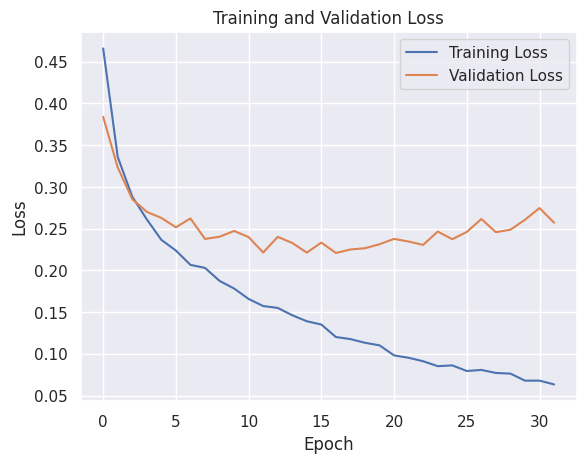

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Split the resampled training data into training and validation sets
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Neural network model
model = Sequential([
    Dense(128, input_shape=(X_train_smote.shape[1],), activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min', restore_best_weights=True)

# Fit the model on the training data with validation split
history = model.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val_smote, y_val_smote),
    epochs=100, batch_size=128, verbose=1,
    callbacks=[early_stopping]
)

# Plot the training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

77/77 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       False       0.93      0.92      0.93      2079
        True       0.57      0.62      0.59       362

    accuracy                           0.87      2441
   macro avg       0.75      0.77      0.76      2441
weighted avg       0.88      0.87      0.88      2441



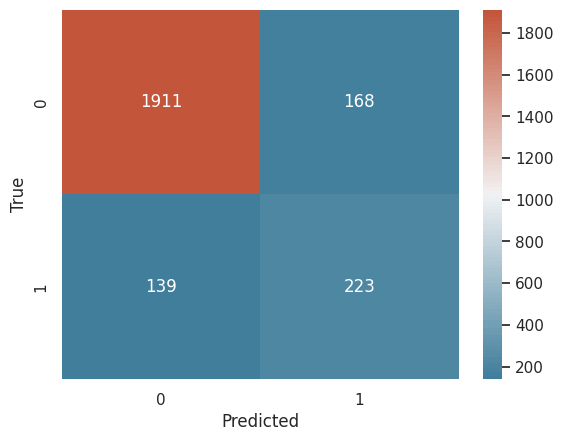

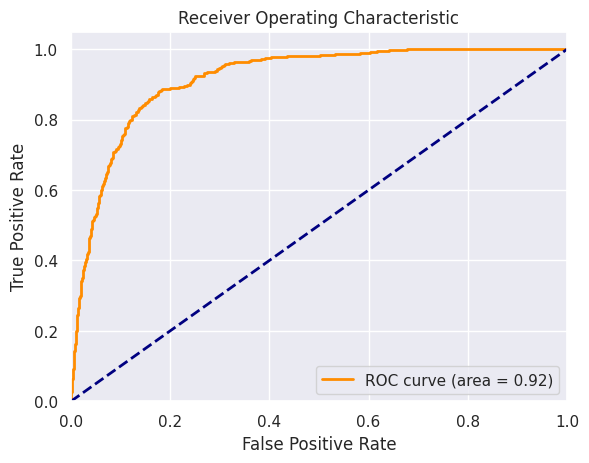

In [33]:
# Predict on the test data
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.round(y_pred_probs).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Although the model achieved a high precision of 94% and a recall of 90% for non-purchases, indicating a strong capability to correctly identify the majority of non-purchase sessions; for purchases, the precision was lower at 53%, and the recall was 64%. This indicates that while the model has a moderate ability to identify true purchasing sessions, it also tends to misclassify non-purchases as purchases more frequently than the Decision Tree and Random Forest models. These results suggest that while the Neural Network model has learned to differentiate between purchasing and non-purchasing behavior to some extent, the lower precision for purchases might be indicative of the model’s sensitivity to the imbalanced data, even after applying SMOTE oversampling. Hence, the model could benefit from further tuning of the architecture, such as implementing a more sophisticated network or adjusting hyperparameters more accurately; however, as stated for the Random Forest results, the complexity of a neural network model may not be
beneficial to deal with dataset that do not have complex relationships between features.

## Hyperparameters Tuning
Testing the hypothesis that model-specific hyperparameter optimization could enhance the Random Forest and Neural Network’s predictive performance, a rigorous hyperparameters tuning experiment was undertaken using an optimization criterion of maximising the weighted F1 score. The Random Forest model was tuned using HalvingRandomSeach (Scikit-learn 2011b); similarly, the NN was tuned using an efficient Random Search algorithm (Li et al. 2018) through Keras Tuner (Keras 2015c). Despite these efforts, the models failed to outperform the Decision Tree model, reinforcing
the hypothesis that the data may possess an irreducible noise error.

### Hyperparameters Tuning - Random Forest

In [34]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(k_neighbors=2, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define a stratified K-fold to ensure each fold is representative of the class proportions
stratified_kfold = StratifiedKFold(n_splits=2)

# Define a grid of hyperparameters to search over
param_distributions = {
    'classifier__n_estimators': [10, 25, 50, 75, 100, 150, 250, 400],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [None, 10, 20, 30, 50],
    'classifier__min_samples_leaf': [1, 2, 4, 5, 10],
    'classifier__max_samples': np.linspace(0.1, 0.9, num=8)
}

# We use make_scorer to create a scorer object that scores the weighted average F1 score
f1_scorer = make_scorer(f1_score, average='weighted')

# Set up the halving random search with cross-validation
halving_search = HalvingRandomSearchCV(estimator=pipeline, 
                                       param_distributions=param_distributions, 
                                       scoring=f1_scorer, 
                                       n_candidates='exhaust',
                                       factor=3,
                                       random_state=42,
                                       n_jobs=-1,
                                       cv=stratified_kfold)

halving_search.fit(X_train, y_train)

best_params = halving_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'classifier__n_estimators': 75, 'classifier__min_samples_leaf': 4, 'classifier__max_samples': 0.9, 'classifier__max_features': 'sqrt', 'classifier__max_depth': None}


              precision    recall  f1-score   support

       False       0.95      0.92      0.93      2079
        True       0.61      0.71      0.65       362

    accuracy                           0.89      2441
   macro avg       0.78      0.82      0.79      2441
weighted avg       0.90      0.89      0.89      2441



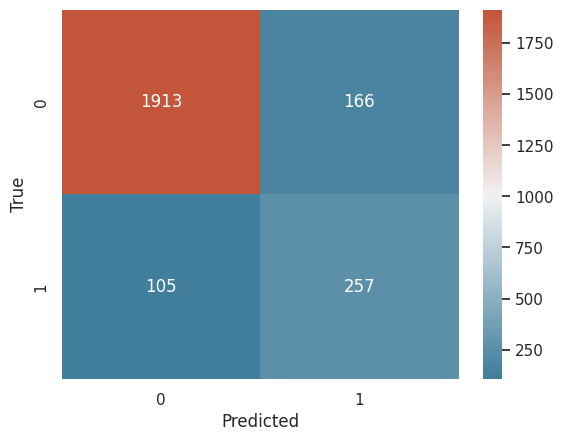

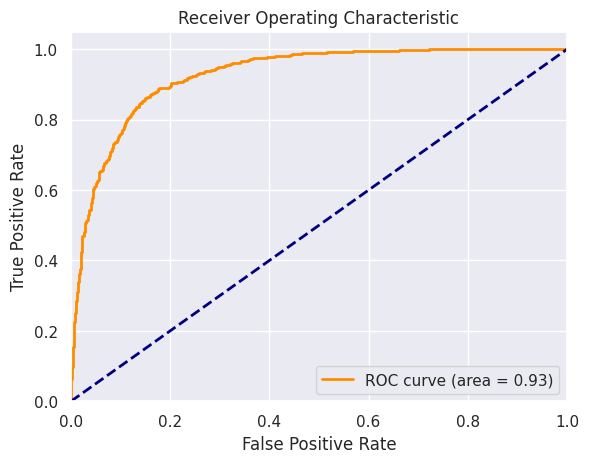

In [35]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=75, min_samples_leaf=4, max_features='sqrt', max_samples=0.9, max_depth=None, criterion='entropy', random_state=42))
])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Hyperparameters Tuning - Neural Network

In [36]:
import keras_tuner as kt
from keras.layers import InputLayer

def build_model(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train_smote.shape[1],)))
    # Tune the number of layers.
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune the number of units in the Dense layers.
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=32,
                                     max_value=512,
                                     step=32),
                        activation='relu'))
        model.add(Dropout(hp.Float('dropout_' + str(i),
                                   min_value=0.0,
                                   max_value=0.5,
                                   default=0.25,
                                   step=0.05)))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Instantiate the tuner.
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=50,  # Adjust the maximum number of epochs per trial.
                     factor=3,
                     directory='keras_tuning',
                     project_name='keras_tuner')

# Early stopping callback.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Execute the hyperparameter search.
tuner.search(X_train_smote, y_train_smote,
             epochs=50,  # Set the number of epochs for training.
             validation_data=(X_val_smote, y_val_smote),
             callbacks=[stop_early])

# Get the optimal hyperparameters.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of layers is {best_hps.get('num_layers')}, 
the optimal number of units in the first densely-connected layer is {best_hps.get('units_0')}, 
the optimal dropout rate is {best_hps.get('dropout_0')}, 
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it on the data.
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_smote, y_train_smote, epochs=50, validation_data=(X_val_smote, y_val_smote))


Trial 90 Complete [00h 01m 32s]
val_loss: 0.27890321612358093

Best val_loss So Far: 0.18992069363594055
Total elapsed time: 00h 32m 27s

The hyperparameter search is complete. The optimal number of layers is 2, 
the optimal number of units in the first densely-connected layer is 160, 
the optimal dropout rate is 0.25, 
and the optimal learning rate for the optimizer is 0.001.

Epoch 1/50
411/411 [==============================] - 3s 5ms/step - loss: 0.4384 - accuracy: 0.8043 - val_loss: 0.3486 - val_accuracy: 0.8610
Epoch 2/50
411/411 [==============================] - 2s 4ms/step - loss: 0.3490 - accuracy: 0.8557 - val_loss: 0.3005 - val_accuracy: 0.8814
Epoch 3/50
411/411 [==============================] - 2s 4ms/step - loss: 0.3053 - accuracy: 0.8772 - val_loss: 0.2828 - val_accuracy: 0.8926
Epoch 4/50
411/411 [==============================] - 2s 4ms/step - loss: 0.2874 - accuracy: 0.8870 - val_loss: 0.2773 - val_accuracy: 0.8908
Epoch 5/50
411/411 [==============================]

77/77 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       False       0.93      0.91      0.92      2079
        True       0.56      0.62      0.59       362

    accuracy                           0.87      2441
   macro avg       0.75      0.77      0.76      2441
weighted avg       0.88      0.87      0.87      2441



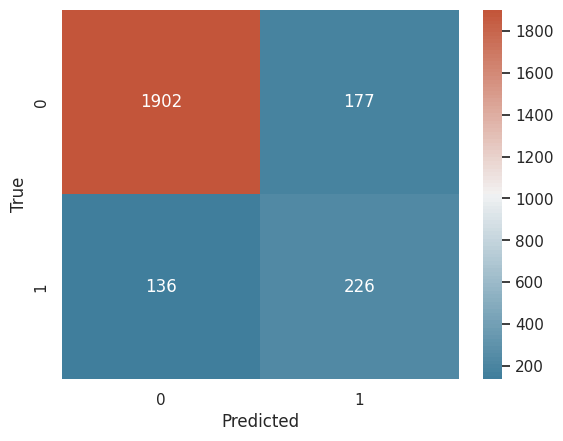

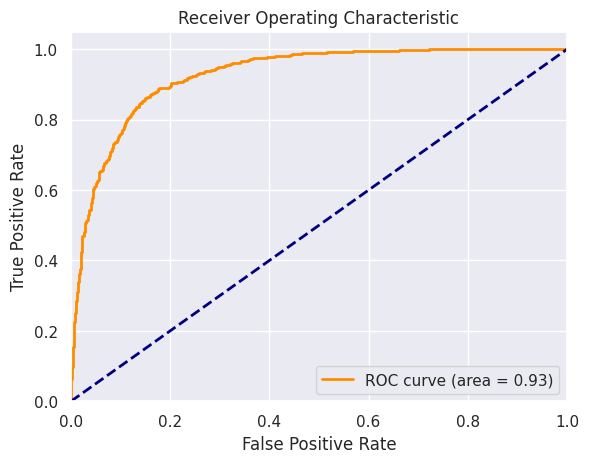

In [37]:
# Predict on the test data
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.round(y_pred_probs).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Handling skewness in the distribution of features

Since skewed data can affect the prediction of the model, I'll try to apply log-transformation to the features and analyse the results of the classifier

In [38]:
numerical_columns_to_transoform = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend']

df[numerical_columns_to_transoform] = df[numerical_columns_to_transoform].apply(np.log1p)
df[numerical_columns_to_transoform] = df[numerical_columns_to_transoform].apply(np.sqrt)

Let's look at the distribution of the tranformed features

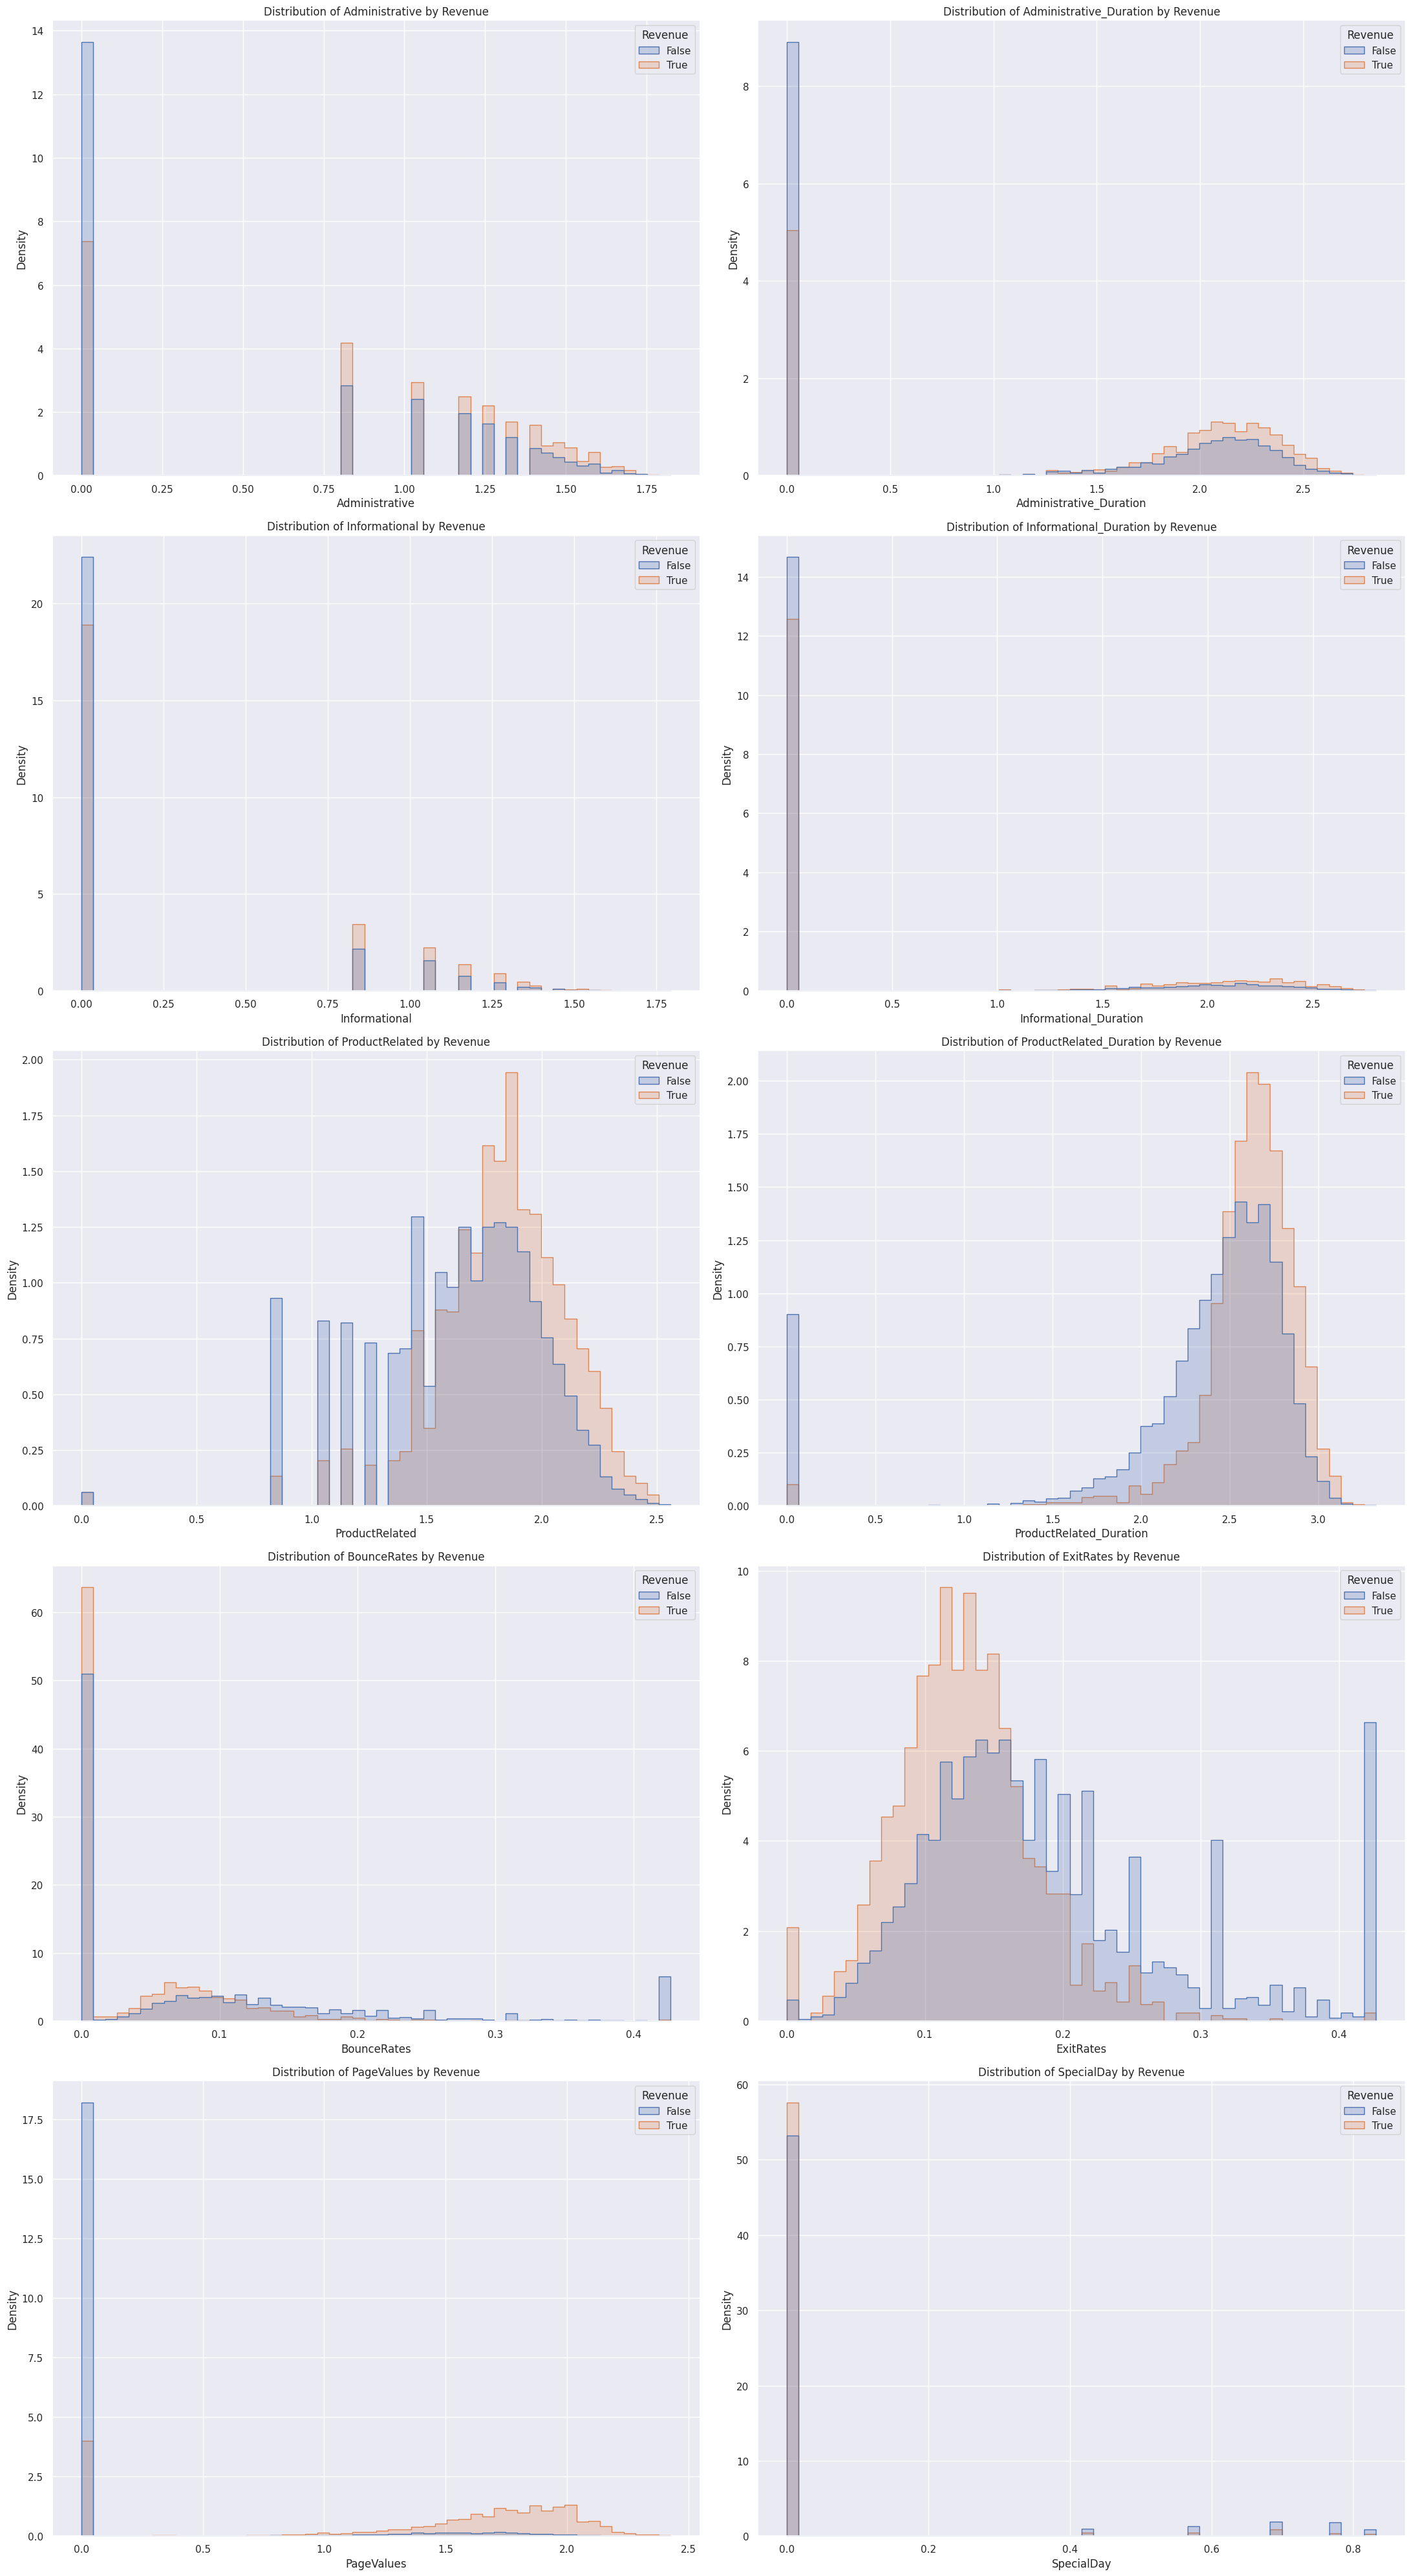

In [39]:
fig, axes = plt.subplots(5, 2, figsize=(22, 40))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(numerical_columns_to_transoform, axes.flatten()):
    sns.histplot(data=df, x=col, hue="Revenue", element="step", stat="density", common_norm=False, bins=50, ax=ax)
    ax.set_title(f'Distribution of {col} by Revenue')

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2079
        True       0.71      0.58      0.64       362

    accuracy                           0.90      2441
   macro avg       0.82      0.77      0.79      2441
weighted avg       0.90      0.90      0.90      2441



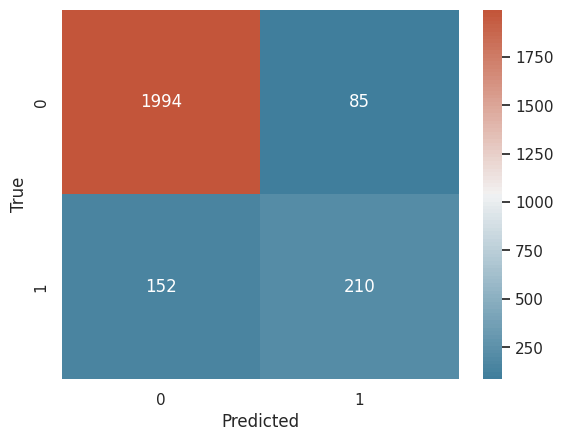

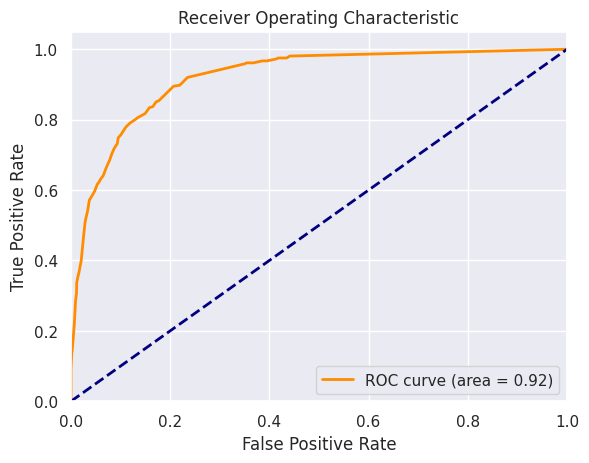

In [40]:
y = df['Revenue'] # Labels
X = df[df.columns.difference(['Revenue']).to_list()] # Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a pipeline that first scales the data then applies Decision Tree Classifier
pipe = Pipeline([
                ('scaler', StandardScaler()), 
                ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50, random_state=42))
                ])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

There is no improvment in the performance, probably because the tree-based models are not strongly affected by data distributions 

## Conclusions
This report has methodically investigated the predictive modeling of online shoppers’ purchasing intentions, providing valuable insights into consumer behavior by leveraging advanced AI methodologies. We have examined the dataset, applied exploratory data analysis, and engaged with various machine learning models, adjusting for class imbalance with SMOTE. Our findings reveal the predominance of ’PageValues’ in influencing purchasing decisions. The Decision Tree Classifier emerged as the most effective model, suggesting simplicity can often rival complexity in predictive power. Moreover, despite hyperparameters tuning, neither Random Forest nor Neural Network models could outperform the Decision Tree, reinforcing the presence of an irreducible noise error within the dataset. Future work may explore additional fine tuning of the models, alternative imbalance mitigation techniques, feature engineering or the integration of unsupervised learning for
further enhancement of predictive performance.

## References
Biau, G. & Scornet, E. (2016), ‘A random forest guided tour’, Test 25, 197–227.

Chawla, N., Bowyer, K., Hall, L. & Kegelmeyer, W. (2002), ‘Smote: Synthetic minority oversampling technique’, J. Artif. Intell. Res. (JAIR) 16, 321–357. Chollet, F. et al. (2015), ‘Keras’, https://github.com/fchollet/keras. Accessed: 2024-01-08.

Keras (2015a), ‘keras.callbacks.earlystopping’, https://keras.io/api/callbacks/early_ stopping/. Accessed: 2024-01-07.

Keras (2015b), ‘keras.optimizers.adam’, https://keras.io/api/optimizers/adam/. Accessed: 2024-01-07.

Keras (2015c), ‘keras tuner.hyperband’, hyperband/. Accessed: 2024-01-08.
https://keras.io/api/keras_tuner/tuners/

Li, L., Jamieson, K., DeSalvo, G., Rostamizadeh, A. & Talwalkar, A. (2018), ‘Hyperband: A novel bandit-based approach to hyperparameter optimization’, Journal of Machine Learning Research 18(185), 1–52. URL: http://jmlr.org/papers/v18/16-558.html

Mitchell, T. (1997), Machine Learning, McGraw-Hill International Editions, McGraw-Hill. URL: https://books.google.co.uk/books?id=EoYBngEACAAJ

Sakar, C. O., Polat, S. O., Katircioglu, M. & Kastro, Y. (2019), ‘Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and lstm recurrent neural networks’, Neural Computing and Applications 31, 6893–6908. URL: https://api.semanticscholar.org/CorpusID:13682776

Scikit-learn (2011a), ‘sklearn.ensemble.randomforestclassifier’, https://scikit-learn.org/ stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. Accessed: 2024-01-02.

Scikit-learn (2011b), ‘sklearn.model selection.halvingrandomsearchcv’, https://scikit-learn. org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html. Accessed: 2024-01-08.

Scikit-learn (2011c), ‘sklearn.preprocessing.labelencoder’, https://scikit-learn.org/stable/ modules/generated/sklearn.preprocessing.LabelEncoder.html. Accessed: 2024-01-02.

Scikit-learn (2011d), ‘sklearn.preprocessing.onehotencoder’, https://scikit-learn.org/stable/ modules/generated/sklearn.preprocessing.OneHotEncoder.html. Accessed: 2024-01-02.

Scikit-learn (2011e), ‘sklearn.preprocessing.standardscaler’, https://scikit-learn.org/stable/ modules/generated/sklearn.preprocessing.StandardScaler.html. Accessed: 2024-01-02.

Scikit-learn (2011f), ‘sklearn.tree.decisiontreeclassifier’, https://scikit-learn.org/stable/
modules/generated/sklearn.tree.DecisionTreeClassifier.html. Accessed: 2024-01-02.